In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
a1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a2 = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [3]:
np.intersect1d(a1, a2)

array([ 8,  9, 10])

In [4]:
np.union1d(a1, a2)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

### Dependent and Independent Check

If probability of intersect of two sets are equal or too close to multiplication of probabilities of sets, we can say they are independent.

Example:

Do people with glasses marry people with glasses?

1000 families, 150 only father myopic, 200 only mother myopic and only 50 families both of them myopic.

In [6]:
p_fat = (150 + 50)/1000
p_mot = (200 + 50)/1000

p_both = 50/1000

p_fat*p_mot, p_both # independent

(0.05, 0.05)

1000 families, 150 only father obese, 200 only mother obese and 100 families both of them obese

Do fat people marry each other?

In [8]:
p_fat = (150 + 100)/1000
p_mot = (200 + 100)/1000

p_both = 100/1000

p_fat*p_mot, p_both # dependent -> intersect is bigger than multiplication

(0.075, 0.1)

### Conditional Probability

If two events are dependent, we need to look at their conditional probability.

Example:

12% of women develop breast cancer before 70 years of age
1% of women have harmful mutations in BRCA1 gene
The probability that a woman has mutated BRCA1 if she is diagnosed with cancer is 0.05

P(BC) = 0.12
P(BRCA1) = 0.01
P(BRCA1|BC) = 0.05

What is P(BC|BRCA1) ?

In [10]:
P_intersect = 0.05*0.12
P_intersect/0.01

0.6

### Relative Risk

P(B|A) / P(B|not A)

For this example P(BC|BRCA1) / P(BC|not BRCA1)

P(not BRCA1) = 1 - P(BRCA1)

P(BC) = P(BC ∩ BRCA1) + P(BC ∩ not BRCA1)

In [11]:
P_BRCA1 = 0.01
P_nBRCA1 = 1 - P_BRCA1

P_intBCBR = 0.006
P_intBCnBR = 0.12 - P_intBCBR

P_BCisgivennBR = P_intBCnBR / P_nBRCA1

ReRi = 0.6 / P_BCisgivennBR
ReRi

5.2105263157894735

### Bayes' Rule

P(B|A) = P(A|B)*P(B)/P(A)

Prior of event A: P(A)
Posterior of event A: P(A|B)

Prior: Probability of having melanoma
Posterior: Probability of having melanoma if your cousin is diagnosed with melanoma

In [12]:
P_BCBRCA1 = 0.05*0.12/0.01
P_BCBRCA1

0.6

In [13]:
df = pd.DataFrame({"PSA test result": ["+", "+", "-", "-"],
                  "Prostate cancer": ["+", "-", "+", "-"],
                  "Frequency": [92, 27, 46, 72]})
df

,PSA test result,Prostate cancer,Frequency
0,+,+,92
1,+,-,27
2,-,+,46
3,-,-,72


In [18]:
print("Predictive value positive PV+ :\t", "92/(92+27) = 0.77")
print("Predictive value negative PV- :\t", "72/(72+46) = 0.61")
print("Sensitivity:\t\t\t", "92/(92+46) = 0.67")
print("Specificity:\t\t\t", "72/(72+27) = 0.73")

Predictive value positive PV+ :	 92/(92+27) = 0.77
Predictive value negative PV- :	 72/(72+46) = 0.61
Sensitivity:			 92/(92+46) = 0.67
Specificity:			 72/(72+27) = 0.73


In [21]:
dis_sta = ["Definitely normal", "Probably normal", "Questionable", 
           "Probably abnormal", "Definitely abnormal", "Total"]
Normal = [33, 6, 6, 11, 2, 58]
Abnormal = [3, 2, 2, 11, 33, 51]
Total = [36, 8, 8, 22, 35, 109]

CT_rating = pd.DataFrame({"True disease status": dis_sta,
                         "Normal": Normal,
                         "Abnormal": Abnormal,
                         "Total": Total})

CT_rating = CT_rating.transpose()
CT_rating

,0,1,2,3,4,5
True disease status,Definitely normal,Probably normal,Questionable,Probably abnormal,Definitely abnormal,Total
Normal,33,6,6,11,2,58
Abnormal,3,2,2,11,33,51
Total,36,8,8,22,35,109


In [29]:
CT_rating1 = CT_rating.iloc[1:,:]
CT_rating1.columns = CT_rating.iloc[0,:]
CT_rating1

True disease status,Definitely normal,Probably normal,Questionable,Probably abnormal,Definitely abnormal,Total
Normal,33,6,6,11,2,58
Abnormal,3,2,2,11,33,51
Total,36,8,8,22,35,109


In [54]:
TestPosCri = ["CT0", "CT1", "CT2", "CT3", "CT4", "CT5"]
Sensitivity = np.array([])
Specificity = np.array([])
for i in range(CT_rating1.shape[1]):
    Sensitivity = np.round(np.append(Sensitivity, (np.sum(CT_rating1.iloc[0,0:i])/CT_rating1.iloc[0,5])), decimals=2)
    Specificity = np.round(np.append(Specificity, 1-((np.sum(CT_rating1.iloc[1,0:i])/CT_rating1.iloc[1,5]))), decimals=2)
    
Sensitivity, Specificity

(array([0.  , 0.57, 0.67, 0.78, 0.97, 1.  ]),
 array([1.  , 0.94, 0.9 , 0.86, 0.65, 0.  ]))

In [55]:
ROCdf = pd.DataFrame({"Test-positive criteria": TestPosCri,
                      "Sensitivity": Sensitivity,
                      "Specificity": Specificity})
ROCdf

,Test-positive criteria,Sensitivity,Specificity
0,CT0,0.00,1.00
1,CT1,0.57,0.94
2,CT2,0.67,0.90
3,CT3,0.78,0.86
4,CT4,0.97,0.65
5,CT5,1.00,0.00


In [56]:
1-Specificity

array([0.  , 0.06, 0.1 , 0.14, 0.35, 1.  ])

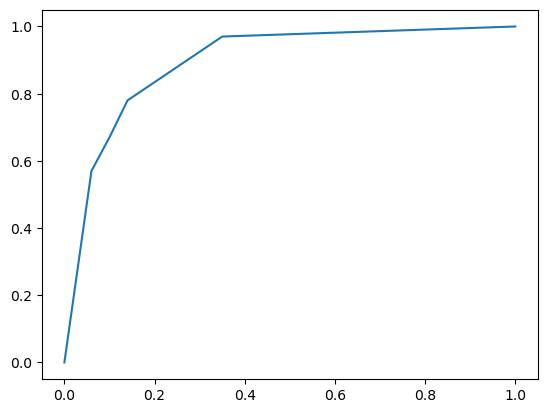

In [58]:
plt.plot(1-Specificity, Sensitivity)